In [1]:
import pandas as pd

In [2]:
sale_january2019_url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_January_2019.csv'
sale_january2019_df = pd.read_csv(sale_january2019_url)

sale_february2019_url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_February_2019.csv'
sale_february2019_df = pd.read_csv(sale_february2019_url)

sale_march2019_url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_March_2019.csv'
sale_march2019_df = pd.read_csv(sale_march2019_url)

sale_aprila2019_url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_April_2019.csv'
sale_april2019_df = pd.read_csv(sale_aprila2019_url)

sale_may2019_url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_May_2019.csv'
sale_may2019_df = pd.read_csv(sale_may2019_url)

sale_june2019_url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_June_2019.csv'
sale_june2019_df = pd.read_csv(sale_june2019_url)

sale_july2019_url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_July_2019.csv'
sale_july2019_df = pd.read_csv(sale_july2019_url)

sale_august2019_url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_August_2019.csv'
sale_august2019_df = pd.read_csv(sale_august2019_url)

sale_september2019_url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_September_2019.csv'
sale_september2019_df = pd.read_csv(sale_september2019_url)


sale_october2019_url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_October_2019.csv'
sale_october2019_df = pd.read_csv(sale_october2019_url)

sale_november2019_url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_November_2019.csv'
sale_november2019_df = pd.read_csv(sale_november2019_url)

sale_december2019_url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_December_2019.csv'
sale_december2019_df = pd.read_csv(sale_december2019_url)


frame_df = [sale_january2019_df,
            sale_february2019_df,
            sale_march2019_df,
            sale_april2019_df,
            sale_may2019_df,
            sale_june2019_df,
            sale_july2019_df,
            sale_august2019_df,
            sale_september2019_df,
            sale_october2019_df,
            sale_november2019_df,
            sale_december2019_df]

all_data = pd.concat(frame_df)

len(all_data)

186850

In [3]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [4]:
index = all_data[all_data['Month'] == 'Or'].index
all_data.drop(index , inplace=True)

In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [6]:
all_data['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan], dtype=object)

In [7]:
# all_data[all_data.isna().any(axis=1)]

In [8]:
nan_df = all_data[all_data.isna().any(axis=1)]
# nan_df.head()

# all_data=all_data.dropna(how ='all')
# all_data.head()

In [9]:
#all_data = all_data[all_data['Order Date'].str[0:2] !='or']

In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1.0,1.0,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1.0,1.0,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2.0,2.0,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1.0,1.0,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1.0,1.0,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [12]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1.0,1.0,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1.0,1.0,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2.0,2.0,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1.0,1.0,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1.0,1.0,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [13]:
df_test = all_data.copy()
df_test['year'] = df_test['Order Date'].str[6:8]
df_test['year'].value_counts()

19    182701
20        34
Name: year, dtype: int64

In [14]:
# what was the best month for sales?How much was earned that month?
all_data['Sale'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,141234,iPhone,1.0,1.0,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,1.0
1,141235,Lightning Charging Cable,1.0,1.0,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,1.0
2,141236,Wired Headphones,2.0,2.0,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,4.0
3,141237,27in FHD Monitor,1.0,1.0,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,1.0
4,141238,Wired Headphones,1.0,1.0,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,1.0


In [15]:
# what was the best month for sales? How much was earned that month?
all_data.groupby('Month').sum().reset_index().sort_values('Sale', ascending = False)

<ipython-input-15-cdc6ab66bee9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby('Month').sum().reset_index().sort_values('Sale', ascending = False)


,Month,Quantity Ordered,Price Each,Sale
11,12,27764.0,27764.0,36122.0
9,10,22356.0,22356.0,28854.0
3,04,20226.0,20226.0,26166.0
10,11,19479.0,19479.0,25505.0
4,05,18344.0,18344.0,23918.0
2,03,16697.0,16697.0,21593.0
6,07,15781.0,15781.0,20743.0
5,06,14964.0,14964.0,19316.0
7,08,13185.0,13185.0,17227.0
1,02,13162.0,13162.0,16940.0


In [16]:
result = all_data.groupby('Month').sum()
result

<ipython-input-16-7f2641f2a2fc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sale
Month,,,
01,10670.0,10670.0,13858.0
02,13162.0,13162.0,16940.0
03,16697.0,16697.0,21593.0
04,20226.0,20226.0,26166.0
05,18344.0,18344.0,23918.0
06,14964.0,14964.0,19316.0
07,15781.0,15781.0,20743.0
08,13185.0,13185.0,17227.0
09,12827.0,12827.0,16609.0


In [17]:
# lets use .apply()
def get_city(address):
  if pd.isnull(address):
      return None
  else:
      return address.str.split(',').str[2]

def get_state(address):
    if pd.isnull(address):
        return None
    else:
        return address.split(', ')[-1].split(' ')[0]


#all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"(get_city(x))   (get_state(x) + ')')
# all_data.head()

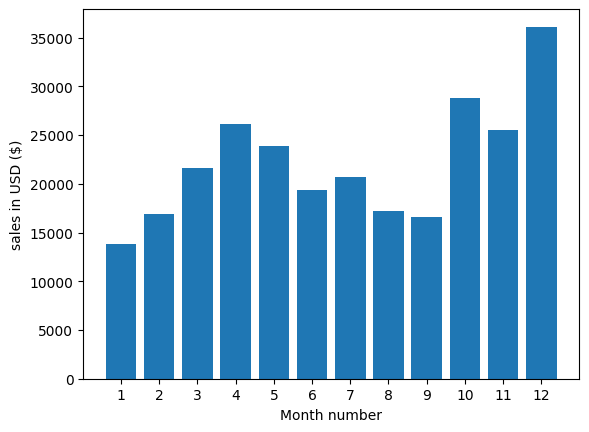

In [17]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, result['Sale'])
plt.xticks(months)
plt.ylabel('sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [18]:
all_data['State'] = all_data['Purchase Address'].apply(get_state)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,State
0,141234,iPhone,1.0,1.0,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,1.0,MA
1,141235,Lightning Charging Cable,1.0,1.0,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,1.0,OR
2,141236,Wired Headphones,2.0,2.0,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,4.0,CA
3,141237,27in FHD Monitor,1.0,1.0,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,1.0,CA
4,141238,Wired Headphones,1.0,1.0,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,1.0,TX


In [19]:
all_data['Purchase Address']
#.str.split(',').str[2].str.split(' ').str[1]

0               944 Walnut St, Boston, MA 02215
1              185 Maple St, Portland, OR 97035
2         538 Adams St, San Francisco, CA 94016
3            738 10th St, Los Angeles, CA 90001
4                 387 10th St, Austin, TX 73301
                          ...                  
25112    14 Madison St, San Francisco, CA 94016
25113      549 Willow St, Los Angeles, CA 90001
25114          273 Wilson St, Seattle, WA 98101
25115            778 River St, Dallas, TX 75001
25116    747 Chestnut St, Los Angeles, CA 90001
Name: Purchase Address, Length: 183271, dtype: object

In [20]:
months = range(1,13)

for i in months:
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12


In [1]:
# what city has the highest number of months
#result = all_data.groupby('City').sum(numeric_only=True)
all_data.columns = all_data.columns.str.strip()
result = all_data.groupby('City').sum(numeric_only=True)


NameError: ignored

In [32]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, result['Sale'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('sale in USD ($)')
plt.xlabel('City name')
plt.show()

KeyError: ignored

In [ ]:
# what time should we display advertisements to maximize likelihood of customer's buying product?


In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [33]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

AttributeError: ignored

In [76]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

KeyError: ignored

In [31]:
# what product are most often sold together?

In [32]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

<ipython-input-32-50d7ea3b1e2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [33]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,3)))

for key, value in count.most_common(10):
  print(key, value)

AttributeError: ignored

In [34]:
# what product sold the most? why do you think it sold the most

<ipython-input-35-5c4e0430d2c8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


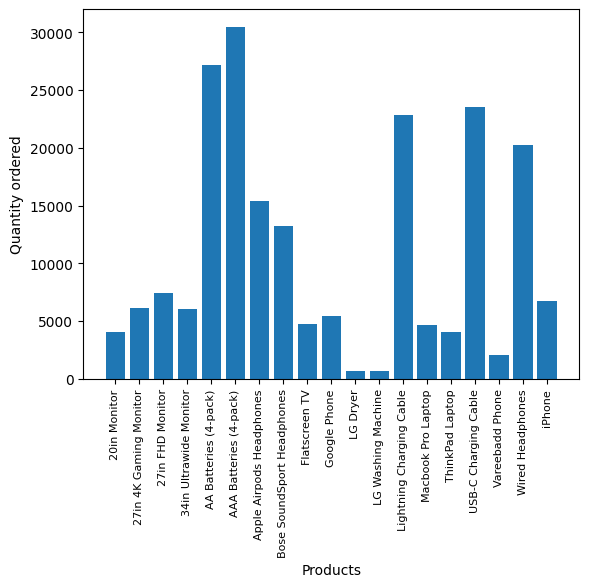

In [35]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity ordered')
plt.xlabel('Products')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

<ipython-input-36-8b51050fb871>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
<ipython-input-36-8b51050fb871>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


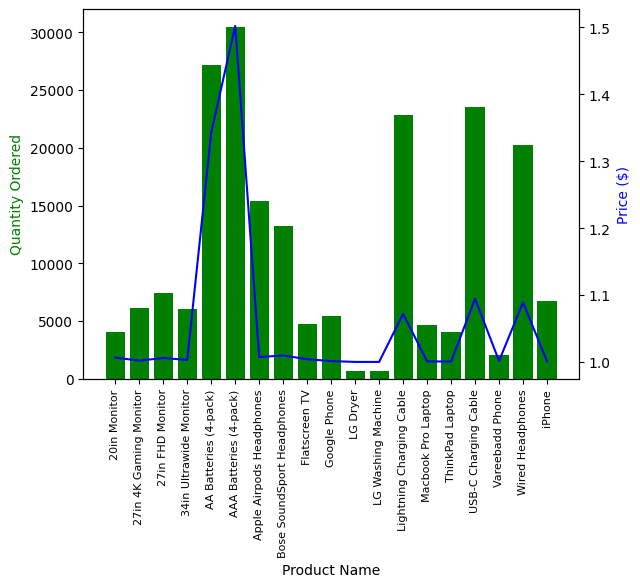

In [36]:
  prices = all_data.groupby('Product').mean()['Price Each']
  fig, ax1 = plt.subplots()

  ax2 = ax1.twinx()
  ax1.bar(products, quantity_ordered, color='g')
  ax2.plot(products, prices, 'b-')

  ax1.set_xlabel('Product Name')
  ax1.set_ylabel('Quantity Ordered', color='g')
  ax2.set_ylabel('Price ($)', color='b')
  ax1.set_xticklabels(products, rotation='vertical', size=8)

  plt.show()
